# Polarization reconstruction with neutrinos

### Oct 21, 2020

## Code

In [1]:
import sys
import csv
# sys.path.insert(0,"/users/PCON0003/cond0068/.local/lib/python3.7/")
sys.path.append("/users/PAS0654/osu8354/ARA_cvmfs/root_build/lib/") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.7/site-packages/")
# sys.path.append("/users/PCON0003/cond0068/pyrex_sims/fromBen/thesis_work/pyrex-custom/analysis/custom/analysis/")
import ROOT
import math
import numpy as np
from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib as mpl
import matplotlib.pyplot as plt
from ROOT import TChain, TSelector, TTree
import os
import matplotlib.colors as mcolors
import scipy
from matplotlib.colors import LogNorm
import pandas as pd
import pyrex
import seaborn as sns
%matplotlib inline
sys.path.insert(1, "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes")
import deDisperse_util as util
from pyrex.internal_functions import normalize
my_path_plots = os.path.abspath("./plots/")

Welcome to JupyROOT 6.18/04


In [2]:
# mpl.use('agg') 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
# mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

current_palette = sns.color_palette('colorblind', 10)
import warnings
warnings.filterwarnings("ignore")


## Gather data

In [22]:
appended_data = []
import os
for filename in os.listdir("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes"):#Loop over desired directory
        if (filename.startswith("pol_quant_noiseless_1E21.0")): #extension, .root in this case
            name = os.path.join("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes", str(filename))
            data = pd.read_pickle(name)
            appended_data.append(data)
recoNu = pd.concat(appended_data)     
recoNu["theta_pol"] = np.degrees(np.arccos(abs(recoNu.pol_z)))
recoNu["theta_pol"] = recoNu["theta_pol"]
recoNu = recoNu.loc[recoNu.rmsV>100]
recoNu = recoNu.loc[recoNu.rmsV<1400]
recoNu = recoNu.loc[recoNu.rmsH>100]
recoNu = recoNu.loc[recoNu.rmsH<1400]
# recoNu = recoNu.loc[recoNu["theta_pol"]<=90]
# recoNu = recoNu.loc[recoNu["AngStokes"]>1]



In [44]:
appended_data = []
import os
for filename in os.listdir("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes"):#Loop over desired directory
        if (filename.startswith("pol_quant_1")): #extension, .root in this case
            name = os.path.join("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes", str(filename))
            data = pd.read_pickle(name)
            appended_data.append(data)
recoNu_noise = pd.concat(appended_data)     
recoNu_noise["theta_pol"] = np.degrees(np.arccos(abs(recoNu_noise.pol_z)))
recoNu_noise = recoNu_noise.loc[recoNu_noise.rmsV>20]
recoNu_noise = recoNu_noise.loc[recoNu_noise.rmsV<1400]
recoNu_noise = recoNu_noise.loc[recoNu_noise.rmsH>20]
recoNu_noise = recoNu_noise.loc[recoNu_noise.rmsH<1400]
# recoNu_noise = recoNu_noise.loc[recoNu_noise["AngStokes"]>1]


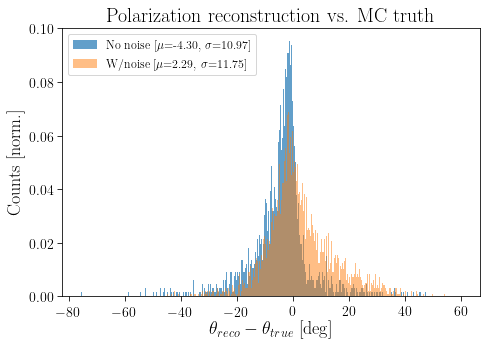

In [12]:
plt.figure(figsize=(7,5))
# plt.hist(recoNu.AngStokes-np.degrees(np.arccos(abs(recoNu.pol_z))), bins=100, density=False, alpha=1);
delta_std = (recoNu.AngRatio-recoNu.theta_pol).std()
delta_mean = (recoNu.AngRatio-recoNu.theta_pol).mean()
plt.hist(recoNu.AngRatio-recoNu.theta_pol, bins=500, density=True, alpha=0.7,label = "No noise [$\mu$=%0.2f, $\sigma$=%0.2f]"%(delta_mean, delta_std));

delta_std = (recoNu_noise.AngRatio-recoNu_noise.theta_pol).std()
delta_mean = (recoNu_noise.AngRatio-recoNu_noise.theta_pol).mean()
plt.hist(recoNu_noise.AngRatio-recoNu_noise.theta_pol, bins=500, density=True, alpha=0.5, color="C1",label = "W/noise [$\mu$=%0.2f, $\sigma$=%0.2f]"%(delta_mean, delta_std));

plt.xlabel("$\\theta_{reco}-\\theta_{true}$ [deg]")
# plt.xlabel("$\\theta$")
plt.ylabel('Counts [norm.]')
plt.title("Polarization reconstruction vs. MC truth")
# plt.yscale("log")
# mplcyberpunk.add_glow_effects()
plt.legend()
plt.tight_layout()
# plt.savefig(my_path_plots+'/Dumpster/recoVsTrue_AraSim.pdf')
# plt.savefig(my_path_plots+'/Dumpster/recoVsTrue_AraSim.png',dpi=150)

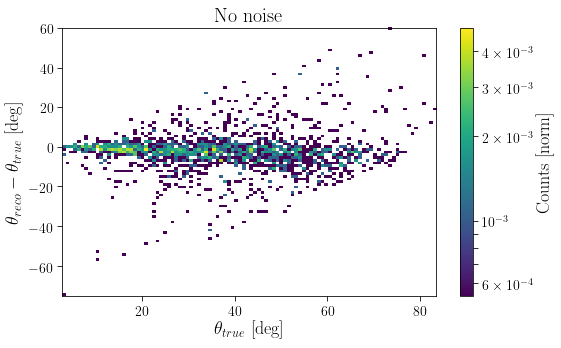

In [43]:
plt.figure(figsize=(8,5))
plt.hist2d(90-recoNu.theta_pol,recoNu.AngRatio-recoNu.theta_pol, bins=100, normed=True,norm=mpl.colors.LogNorm());
# plt.hist2d(90-recoNu_noise.AngStokes,recoNu_noise.AngStokes-recoNu_noise.theta_pol, bins=100, normed=True,norm=mpl.colors.LogNorm());
plt.title("No noise")
# plt.hist2d(angle_Stokes,angle_Stokes-angle_true)
plt.colorbar(label="Counts [norm]")
plt.xlabel("$\\theta_{true}$ [deg]")
plt.ylabel("$\\theta_{reco}-\\theta_{true}$ [deg]")
# plt.title("$10^{21}$ eV neutrinos")
plt.tight_layout()
# plt.ylim(-10,10)
# plt.savefig(my_path_plots+'/Dumpster/deltaMCvsTrue_AraSim_noiseless.pdf')
# plt.savefig(my_path_plots+'/Dumpster/deltaMCvsReco_AraSim_noiseless.png', dpi=150)

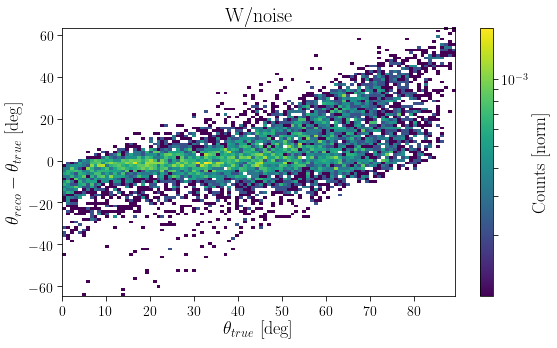

In [45]:
plt.figure(figsize=(8,5))
plt.hist2d(90-recoNu_noise.theta_pol,recoNu_noise.AngRatio-recoNu_noise.theta_pol, bins=100, normed=True,norm=mpl.colors.LogNorm());
plt.title("W/noise")

# plt.hist2d(angle_Stokes,angle_Stokes-angle_true)
plt.colorbar(label="Counts [norm]")
plt.xlabel("$\\theta_{true}$ [deg]")
plt.ylabel("$\\theta_{reco}-\\theta_{true}$ [deg]")
# plt.title("$10^{21}$ eV neutrinos")
plt.tight_layout()
# plt.ylim(-10,10)
# plt.savefig(my_path_plots+'/Dumpster/deltaMCvsTrue_AraSim_noise.pdf')

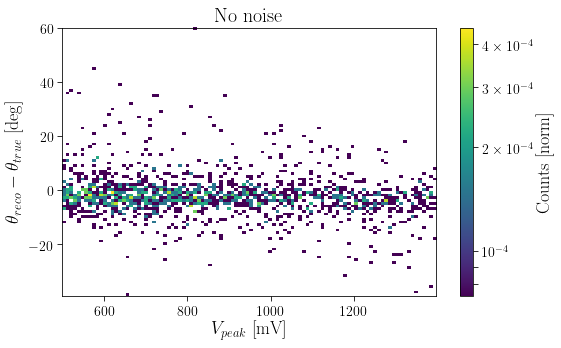

In [26]:
plt.figure(figsize=(8,5))
plt.hist2d(recoNu.rmsV,recoNu.AngRatio-recoNu.theta_pol, bins=100, normed=True,norm=mpl.colors.LogNorm());
# plt.hist2d(90-recoNu_noise.AngStokes,recoNu_noise.AngStokes-recoNu_noise.theta_pol, bins=100, normed=True,norm=mpl.colors.LogNorm());
plt.title("No noise")
# plt.hist2d(angle_Stokes,angle_Stokes-angle_true)
plt.colorbar(label="Counts [norm]")
# plt.xlabel("$\\theta_{true}$ [deg]")
plt.xlabel("$V_{peak}$ [mV]")
plt.ylabel("$\\theta_{reco}-\\theta_{true}$ [deg]")
# plt.title("$10^{21}$ eV neutrinos")
plt.tight_layout()
# plt.ylim(-10,10)
# plt.savefig(my_path_plots+'/Dumpster/deltaMCvsVpeak_AraSim_noiseless.pdf')

(0, 40)

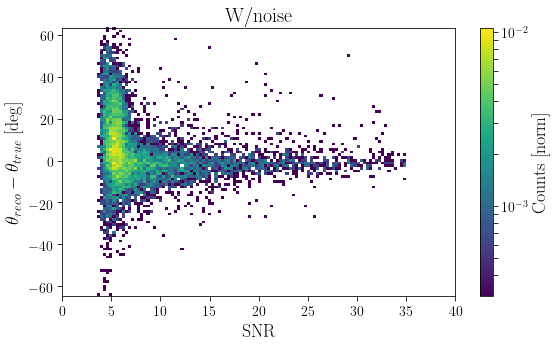

In [12]:
plt.figure(figsize=(8,5))
plt.hist2d(recoNu_noise.rmsH/40,recoNu_noise.AngRatio-recoNu_noise.theta_pol, bins=100, normed=True,norm=mpl.colors.LogNorm());
plt.title("W/noise")

# plt.hist2d(angle_Stokes,angle_Stokes-angle_true)
plt.colorbar(label="Counts [norm]")
plt.xlabel("SNR")
plt.ylabel("$\\theta_{reco}-\\theta_{true}$ [deg]")
# plt.title("$10^{21}$ eV neutrinos")
plt.tight_layout()
plt.xlim(0,40)
# plt.savefig(my_path_plots+'/Dumpster/deltaMCvsRMS_AraSim_noise.pdf')

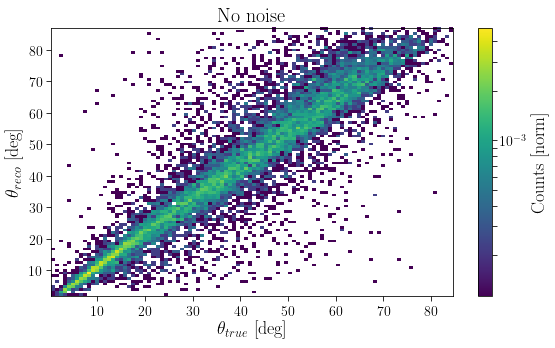

In [16]:
plt.figure(figsize=(8,5))
plt.title("No noise")
plt.hist2d(90-recoNu.theta_pol,recoNu.AngStokes, bins=100, normed=True, norm=mpl.colors.LogNorm());
# plt.hist2d(angle_Stokes,angle_Stokes-angle_true)
plt.colorbar(label="Counts [norm]")
plt.xlabel("$\\theta_{true}$ [deg]")
plt.ylabel("$\\theta_{reco}$ [deg]")
plt.tight_layout()
# plt.savefig(my_path_plots+'/Dumpster/recovsTrue2D.png', dpi=200)

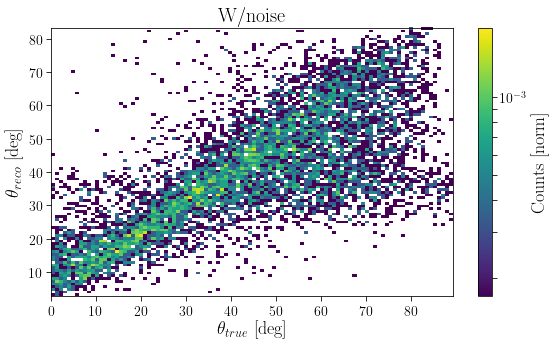

In [48]:
plt.figure(figsize=(8,5))
plt.title("W/noise")
plt.hist2d(90-recoNu_noise.theta_pol,recoNu_noise.AngStokes, bins=100, normed=True, norm=mpl.colors.LogNorm());
# plt.hist2d(angle_Stokes,angle_Stokes-angle_true)
plt.colorbar(label="Counts [norm]")
plt.xlabel("$\\theta_{true}$ [deg]")
plt.ylabel("$\\theta_{reco}$ [deg]")
plt.tight_layout()
# plt.savefig(my_path_plots+'/Dumpster/recovsTrue2D_noise.png', dpi=200)

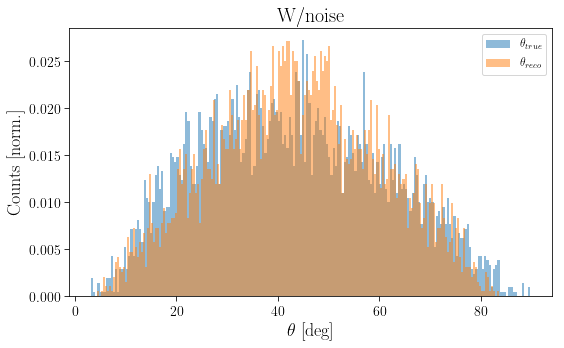

In [6]:
plt.figure(figsize=(8,5))
plt.title("W/noise")
plt.ylabel('Counts [norm.]')
plt.hist(recoNu_noise.theta_pol, bins=200, alpha=0.5, density=True,  label="$\\theta_{true}$");
plt.hist(recoNu_noise.AngStokes, bins=200, alpha=0.5, density=True, label="$\\theta_{reco}$");
plt.xlabel("$\\theta$ [deg]")
plt.legend()
plt.tight_layout()
# plt.savefig(my_path_plots+'/Dumpster/theta_dist_noise.pdf')

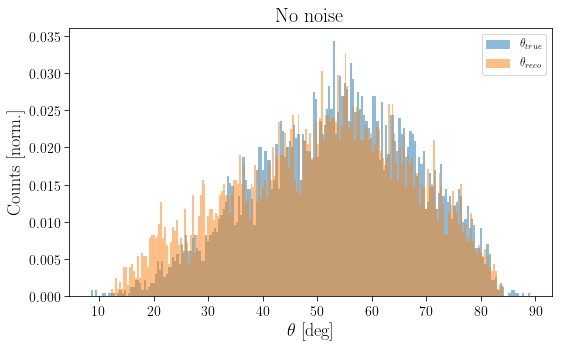

In [72]:
plt.figure(figsize=(8,5))
plt.title("No noise")
plt.ylabel('Counts [norm.]')
plt.hist(recoNu.theta_pol, bins=200, density=True, alpha=0.5,  label="$\\theta_{true}$");
plt.hist(recoNu.AngRatio, bins=200, density=True, alpha=0.5, label="$\\theta_{reco}$");
plt.xlabel("$\\theta$ [deg]")
plt.legend()
plt.tight_layout()
# plt.savefig(my_path_plots+'/Dumpster/theta_dist_noiseless.pdf')

In [12]:
import h5py
fin = h5py.File("/users/PCON0003/cond0068/ARA/AraSim/1e18_n1e5.hdf5", 'r')

In [24]:
fin.keys()

<KeysViewHDF5 ['azimuths', 'energies', 'event_ids', 'flavors', 'inelasticity', 'interaction_type', 'n_interaction', 'xx', 'yy', 'zeniths', 'zz']>

In [54]:
fin["zz"][0]

-2573.2175014849045

## Get input file from outputs

In [39]:
def makeInputFile(posnu_x, posnu_y, posnu_z, nnu_x, nnu_y, nnu_z, nuflavorint, nu_nubar, pnu_exp, currentint, elast_y):
    """
    Make input file to be read by AraSim. 
    Parameters
    ----------
    All the inputs are given in AraSim coordinates/units.
    
    Returns
    -------
    Prints something that can be copied and pasted as an input file.
    
    """
    
    #posnu
    posnu_r = np.linalg.norm(np.array([posnu_x-1E4,posnu_y-1E4,posnu_z-6359729]))
    posnu_phi = np.arccos(posnu_x / np.sqrt(posnu_x ** 2 + posnu_y ** 2))
    posnu_theta = np.arccos(np.sqrt(posnu_x ** 2 + posnu_y ** 2) / posnu_r)

    #nnu
    nnu_phi = np.arccos(nnu_x / np.sqrt(nnu_x ** 2 + nnu_y ** 2))
    nnu_theta = np.arccos(np.sqrt(nnu_x ** 2 + nnu_y ** 2))
    print("//VERSION=0.1\n//EVENT_NUM=" + str(1) + 
          "\n//evid nuflavorint nu_nubar pnu currentint posnu_r posnu_theta posnu_phi nnu_theta nnu_phi elast_y\n")
    print("{:08d} {:01d} {:01d} {:.3f} {:01d} {:.4f} {:.4f} {:.4f} {:.4f} {:.4f} {:.4f}\n".format(1, 
        int(nuflavorint), int(nu_nubar), pnu_exp, int(currentint), posnu_r, posnu_theta, posnu_phi, nnu_phi, nnu_theta, elast_y))

In [40]:
makeInputFile(9166.1881335166, 10445.658027555348, 6357067.375989879,-0.47520312327902275, 0.2136404447635484, 0.8535454012453556,1,0,21,1,0.688) 


//VERSION=0.1
//EVENT_NUM=1
//evid nuflavorint nu_nubar pnu currentint posnu_r posnu_theta posnu_phi nnu_theta nnu_phi elast_y

00000001 1 0 21.000 1 2824.5523 nan 0.8505 2.7191 1.0228 0.6880



In [27]:
recoNu_out = recoNu.loc[abs(recoNu.AngRatio-recoNu.theta_pol)>5]

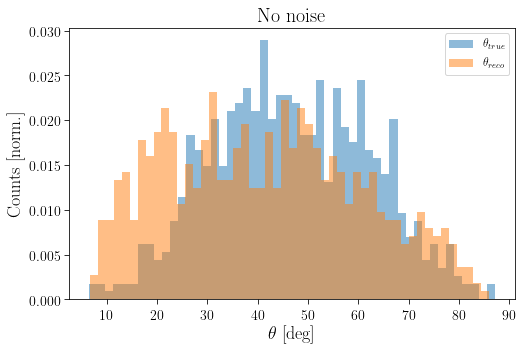

In [24]:
plt.figure(figsize=(8,5))
plt.title("No noise")
plt.ylabel('Counts [norm.]')
plt.hist(recoNu_out.theta_pol, bins=50, density=True, alpha=0.5,  label="$\\theta_{true}$");
plt.hist(recoNu_out.AngRatio, bins=50, density=True, alpha=0.5, label="$\\theta_{reco}$");
plt.xlabel("$\\theta$ [deg]")
plt.legend()

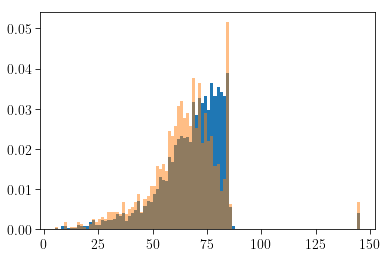

In [16]:
plt.hist(np.degrees(recoNu.theta_reco), bins=100, density=True);
plt.hist(np.degrees(recoNu_out.theta_reco),density=True, bins=100, alpha=0.5);

Text(0.5,0,'$\\theta_{rec}$')

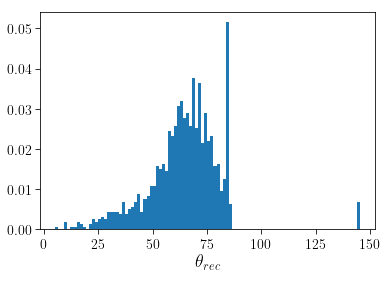

In [17]:
plt.hist(np.degrees(recoNu_out.theta_reco),density=True, bins=100);
plt.xlabel("$\\theta_{rec}$")

In [28]:
len(recoNu_out)

708